**SPARK FOUNDATION PROJECT DEC 22**

**TASK 5 Problem Statement**

***An Exploratory Data Analysis(EDA) on Indian Premier League(IPL).
Basically to find out the most successful teams, players and factors contributing to the win or loss of a team.***

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the datasets
deliveries = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\India League\deliveries.csv')
matches = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\India League\matches.csv')

In [3]:
#checking the dataframe or set
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#checking the df or set
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#checking general information
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
#checking general information
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#checking the total numbers of rows and columns
print(deliveries.shape,matches.shape)

(179078, 21) (756, 18)


**List of Participating Teams**

In [8]:
Participating_teams = matches['team1'].tolist() + matches['team2'].tolist()
Participating_teams = list(set(Participating_teams))
Participating_teams

['Deccan Chargers',
 'Rising Pune Supergiant',
 'Kolkata Knight Riders',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Rising Pune Supergiants',
 'Delhi Daredevils',
 'Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Gujarat Lions',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Rajasthan Royals']

*There are total number of 15 teams in Indian Premier League*

**Number of Matches at Each Venue**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(1, 0, 'Maharashtra Cricket Association Stadium'),
  Text(2, 0, 'Saurashtra Cricket Association Stadium'),
  Text(3, 0, 'Holkar Cricket Stadium'),
  Text(4, 0, 'M Chinnaswamy Stadium'),
  Text(5, 0, 'Wankhede Stadium'),
  Text(6, 0, 'Eden Gardens'),
  Text(7, 0, 'Feroz Shah Kotla'),
  Text(8, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
  Text(9, 0, 'Green Park'),
  Text(10, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(11, 0, 'Sawai Mansingh Stadium'),
  Text(12, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(13, 0, 'Dr DY Patil Sports Academy'),
  Text(14, 0, 'Newlands'),
  Text(15, 0, "St George's Park"),
  Text(16, 0, 'Kingsmead'),
  Text(17, 0, 'SuperSport Park'),
  Text(18, 0, 'Buffalo Park'),
  Text(19, 

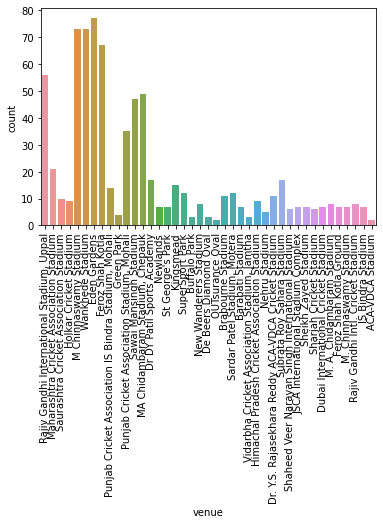

In [9]:
sns.countplot('venue', data=matches)
plt.xticks(rotation='vertical')

*Obviously Eden Gardens has the highest number of matches*

**Total Number of Matches Played by Each Team**

<AxesSubplot:>

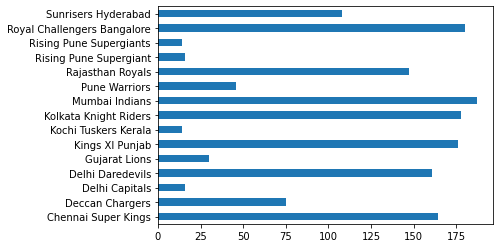

In [10]:
x = matches['team1'].value_counts()
y = matches['team2'].value_counts()
(x+y).plot(kind='barh')

*Mumbai Indians played the highest matches, while Royal Challengers Bangerlore, kolkata Knight Riders, King IX Punjab, Chennai Super King, Delhi Daredevils and Rajastan Royals played in an orderly decreased sequence.*

**Matches Won by Each Team**

In [11]:
x = matches['winner'].value_counts()
print(x)

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


*Mumbai Indians won 109 matches, ordely followed by Chennai Super Kings won 100, Kolkata Knight Riders won 92 and Royal Challengers Bangalore won 84 matches.
This results clearly shows that "Mumbai Indians" are the best teams in the IPL.*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

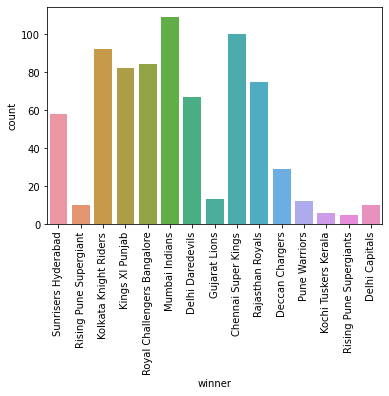

In [12]:
#plotting a visual for this results
sns.countplot('winner', data=matches)
plt.xticks(rotation='vertical')

**10 Best Players of Indian Premier League(IPL)**

*Man of the match*

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


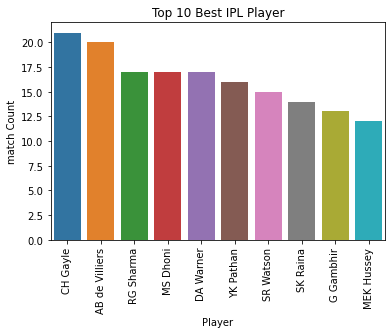

In [13]:
best_player=matches['player_of_match'].value_counts().head(10)
print(best_player)
sns.barplot(x=best_player.index,y=best_player.values,data=matches)
plt.title("Top 10 Best IPL Player")
plt.xticks(rotation=90)
plt.xlabel("Player")
plt.ylabel("match Count")
plt.show()

*Clearly the best player in IPL is CH Gayle while the second is AB Sharma*

**The Top Batsman in the IPL**

<AxesSubplot:title={'center':'The Best Batsman in IPL'}, xlabel='batsman'>

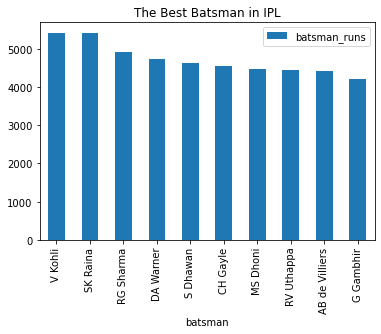

In [14]:
top_batsman=deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar', title='The Best Batsman in IPL')

*V Kohli is at the top followed by SK Raina and other batsmen.*

**The Bowler Who Has Given the Highest Number of Runs**

In [15]:
deliveries.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
264,PP Chawla,4153
126,Harbhajan Singh,4050
7,A Mishra,3850
93,DJ Bravo,3733
381,UT Yadav,3640
340,SL Malinga,3511
269,R Ashwin,3391
251,P Kumar,3342
53,B Kumar,3264
282,RA Jadeja,3221


**The Bowler with Team-wise Performance**

<AxesSubplot:xlabel='batting_team'>

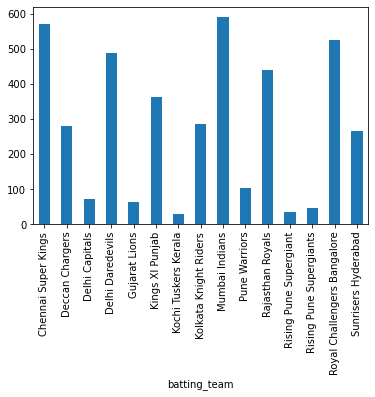

In [16]:
Percentage_performance=deliveries['bowler']=='PP Chawla'
deliveries[Percentage_performance].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

*Obviously when you have PP Chawla and H. Singh in your team, the chances of winning becomes very high.*

**Over-wise Batting Performance of Each Team in the IPL**

<AxesSubplot:xlabel='over', ylabel='batting_team'>

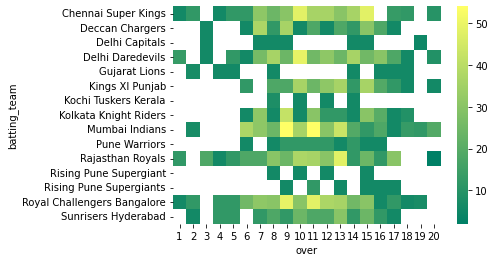

In [17]:
bat_perf=deliveries[Percentage_performance]
bat_perf=bat_perf[['batting_team','over','batsman_runs']]
x=bat_perf.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')
sns.heatmap(x, cmap='summer')

**Dismissal Kind**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

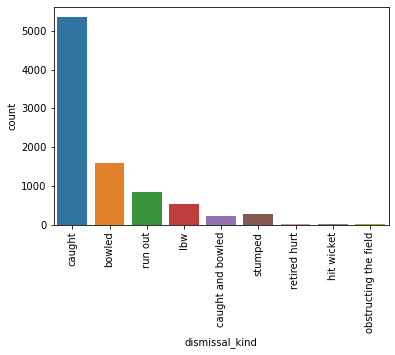

In [18]:
sns.countplot('dismissal_kind', data=deliveries)
plt.xticks(rotation='vertical')

**Number of Runs Made by Virat Kohli Against Jasprit Bumrah**

In [19]:
Percentage_performance=deliveries['bowler']=='JJ Bumrah'
Percentage_performance2=deliveries['batsman']=='V Kohli'
deliveries[Percentage_performance].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

73

**Factors Contrinbuting to The Win or Loss of a Team**

*Analytically Loosing teams have poor finishers, while winning teams such as Mumbai India and Chennai Super Kings have good finishers i.e the likes of PP Chawla and Harbhajan Singh.Therefpre they should buy a good finisher. As you see in the above heatmap, most of the teams are lagging at the end of the map, except Mumbai India and Chennai Super Kings.
Finally, That’s why Mumbai India and Chennai Super Kings are the two most successful teams in the IPL.*